# Import Data and Packages

In [196]:
import pandas as pd 
import numpy as np

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
# When printing df, display all of the text
pd.set_option("display.max_colwidth", -1)

In [198]:
df = pd.read_csv('cleaned_dataset.csv')

In [199]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,wid,age,country,gender,marital,parenthood,reflection_period,...,text_cleaned,verbs,nouns,proto_agent,passive_agent,root_verb,direct_object,parenthood_cat,gender_cat,marital_cat
0,0,0,0,1,37,USA,m,married,y,24h,...,"['wife', 'celebrating', 'year', 'anniversary', 'today']",[celebrating],"[wife, year, anniversary, today]",[wife],[],[celebrating],[anniversary],1,1,1
1,1,1,1,1,37,USA,m,married,y,24h,...,"['mother', 'called', 'blue', 'tell', 'proud']","[called, tell]","[mother, blue]","[mother, she]",[],[called],[me],1,1,1
2,2,2,2,1,37,USA,m,married,y,24h,...,"['today', 'took', 'day', 'time', 'job', 'brunch', 'date', 'wonderful', 'wife']","[took, go, have]","[Today, day, part, time, job, brunch, date, wife]",[i],[],[took],"[day, date]",1,1,1
3,3,3,3,1,37,USA,m,married,y,24h,...,"['just', 'got', 'bonus', 'mturk', 'task']",[got],"[bonus, mturk, task]",[I],[],[got],[bonus],1,1,1
4,4,4,4,1,37,USA,m,married,y,24h,...,"['wife', 'cooked', 'surprise', 'dinner', 'work']","[cooked, take, work]","[wife, surprise, dinner]",[wife],[],[cooked],[dinner],1,1,1


# Best Model

In [200]:
# A list of additional stopper words
extra_stoppers = ['wa', 'able', 'day', 'nice', 'month', 'year', 'today', 'week',
                 'yesterday', 'ha', 'moment', 'life', 'like', 'just', 'lot',
                 'spend', 'spent', 'spending', 'got', 'time']

In [201]:
# Vectorize the data
vectorizer = TfidfVectorizer(stop_words = extra_stoppers)
doc_word = vectorizer.fit_transform(df.text_cleaned)
    
# Instantiate the model
model = NMF(19)
doc_topic = model.fit_transform(doc_word)
    
# Make a list of the words for classifications
words = vectorizer.get_feature_names()
t = model.components_.argsort(axis=1)[:,-1:-10:-1]
topic_words = [[words[e] for e in l] for l in t]

# Print the topics and their top 9 words.
count = 0
for topic_list in topic_words:
    print('Topic ', count, ': ', *topic_list)
    count += 1

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


Topic  0 :  friend best old met seen long talked havent party
Topic  1 :  work early project raise promotion finished bonus received getting
Topic  2 :  went shopping temple walk park trip date mall gym
Topic  3 :  new bought car purchased phone house shoe laptop bike
Topic  4 :  dinner husband delicious ate cooked pizza tonight restaurant having
Topic  5 :  birthday party celebrated gift surprise celebrate brother sister mom
Topic  6 :  favorite restaurant tv food watched eat team meal watching
Topic  7 :  job interview received getting promotion new offer raise finally
Topic  8 :  movie watched watch watching saw theater enjoyed going funny
Topic  9 :  game video played playing won play team baseball basketball
Topic  10 :  family member going vacation easter enjoyed trip weekend mother
Topic  11 :  dog walk took long park morning weather outside walked
Topic  12 :  night sleep hour morning slept bed getting woke date
Topic  13 :  lunch ate delicious food pizza mother free mom took
T

## Add Topic Labels to Dataframe

In [202]:
# Label each row of the df and save the topic labels in a new row called 'topic'.
df['topic'] = doc_topic.argmax(axis=1)

In [203]:
# Print the the number of rows that each topic was labeled. For example, 15,234
# rows were labeled as topic 15.
df.topic.value_counts().argsort

<bound method Series.argsort of 16    11771
18    9212 
3     8807 
1     6694 
7     6503 
11    6104 
9     5932 
2     5814 
0     5308 
10    5028 
13    4479 
12    4417 
15    3548 
6     3271 
17    3152 
14    2915 
8     2635 
5     2245 
4     2037 
Name: topic, dtype: int64>

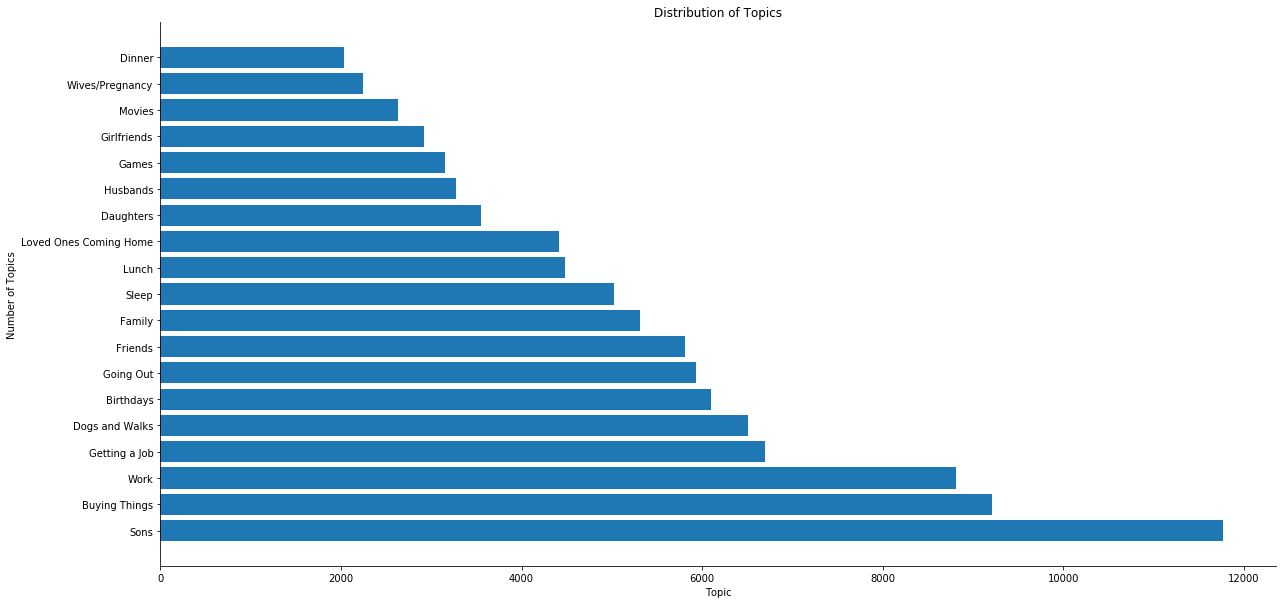

In [204]:
x = ['Sons', 'Buying Things', 'Work', 'Getting a Job', 'Dogs and Walks', 'Birthdays', 'Going Out', 
    'Friends', 'Family', 'Sleep', 'Lunch', 'Loved Ones Coming Home', 'Daughters', 
     'Husbands', 'Games', 'Girlfriends', 'Movies', 'Wives/Pregnancy', 'Dinner']
y = df.topic.value_counts().values

plt.figure(figsize=(20,10))
plt.barh(x,y)
plt.title('Distribution of Topics')
plt.ylabel('Number of Topics')
plt.xlabel('Topic')
sns.despine();

* Topic 0: Friends
* Topic 1: Work
* Topic 2: Going out
* Topic 3: Buying things
* Topic 4: Dinner (Food)
* Topic 5: Birthdays
* Topic 6: Favoirte foods (Food)
* Topic 7: Getting a job
* Topic 8: Movies
* Topic 9: Games
* Topic 10: Family (/parent?)
* Topic 11: Pets and Walks
* Topic 12: Sleep
* Topic 13: Lunch foods (Food)
* Topic 14: Wife and pregnancy (Significant Other)
* Topic 15: Daughter (Child/Parent)
* Topic 16: Son (Child/Parent)
* Topic 17: Girlfriend (Significant Other)
* Topic 18: Someone Coming Home

# Add Generalized Topics to Dataframe

In [216]:
df['topic_generalized'] = df['topic'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                               13, 14, 15, 16, 17, 18], ['Friends', 'Work','Going Out',
                                                'Buying Things', 'Food', 'Birthdays',
                                                'Food', 'Getting a Job', 'Movies', 'Games',
                                                'Family', 'Pets/Walks', 'Sleep/Relaxation',
                                                'Food', 'Significant Other', 'Child/Parent', 'Child/Parent',
                                                'Significant Other', 'Someone Coming Home'])


In [230]:
df.topic_generalized.value_counts().argsort

<bound method Series.argsort of Child/Parent           15319
Food                   9787 
Someone Coming Home    9212 
Buying Things          8807 
Work                   6694 
Getting a Job          6503 
Pets/Walks             6104 
Significant Other      6067 
Games                  5932 
Going Out              5814 
Friends                5308 
Family                 5028 
Sleep/Relaxation       4417 
Movies                 2635 
Birthdays              2245 
Name: topic_generalized, dtype: int64>

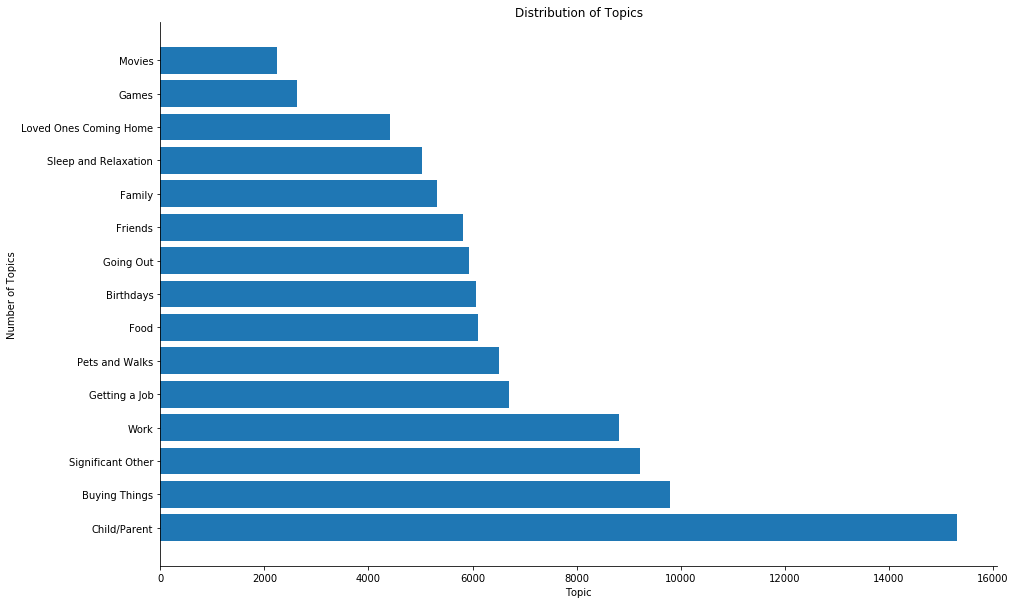

In [231]:
# Graph of distribution of topic labels.
x = ['Child/Parent', 'Buying Things', 'Significant Other', 'Work', 'Getting a Job', 'Pets and Walks', 
     'Food', 'Birthdays', 'Going Out', 'Friends', 'Family', 'Sleep and Relaxation', 'Loved Ones Coming Home', 
     'Games', 'Movies']
y = df.topic_generalized.value_counts().values

plt.figure(figsize=(15,10))
plt.barh(x,y)
plt.title('Distribution of Topics')
plt.ylabel('Number of Topics')
plt.xlabel('Topic')
sns.despine();

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


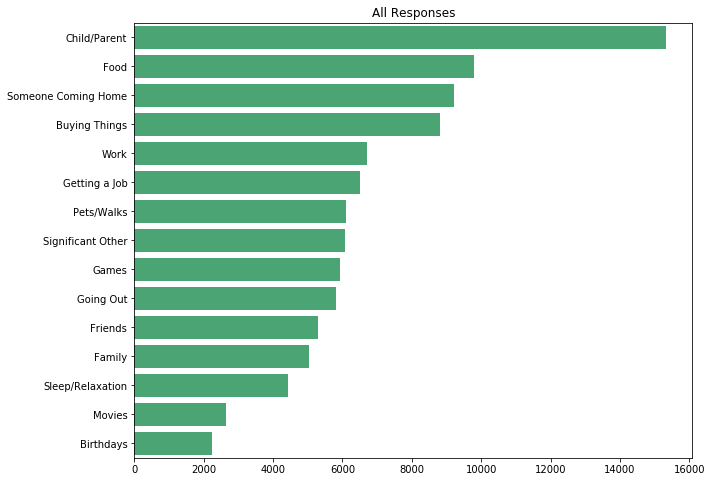

In [232]:
# Graph of distribution of topic labels.
plt.figure(figsize=(10,8))

plt.title('All Responses')
the_series = df.topic_generalized.value_counts()

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='mediumseagreen',  orient='h')
plt.show()

# Plot Topics by Demographic

## Gender

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


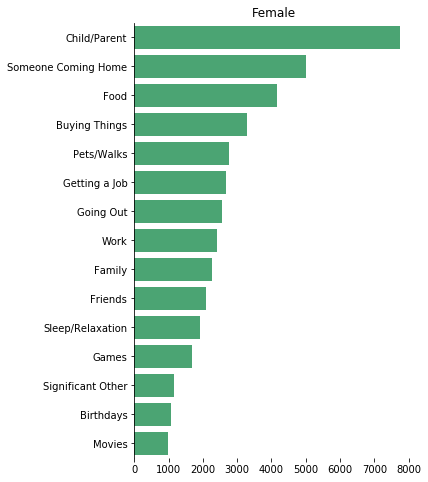

In [233]:
# Topics of females
fig, ax = plt.subplots()
fig.set_size_inches(5, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

plt.title('Female')
the_series = df[df['gender'] == 'f'].topic_generalized.value_counts()

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='mediumseagreen',  orient='h')
plt.show()

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


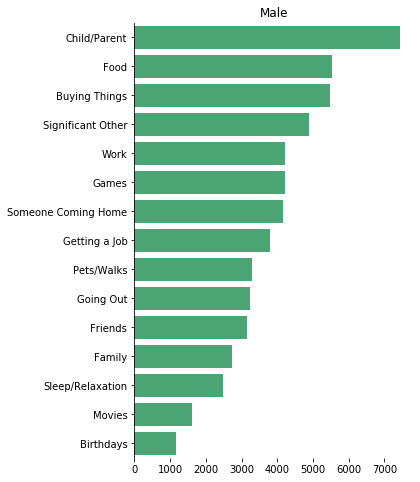

In [234]:
# Topics of males

fig, ax = plt.subplots()
fig.set_size_inches(5, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

plt.title('Male')
the_series = df[df['gender'] == 'm'].topic_generalized.value_counts()

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='mediumseagreen',  orient='h')
plt.show()

## Age

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


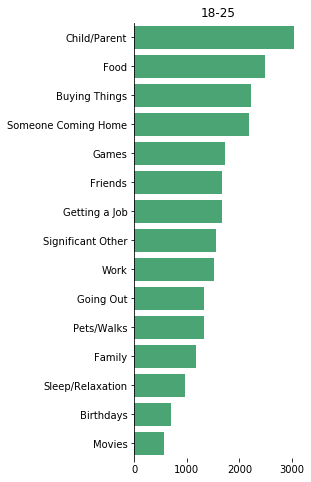

In [235]:
# Topics of 18-25

fig, ax = plt.subplots()
fig.set_size_inches(3, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)


the_series = df[(df.age <= 25) & (df.age >= 18)].topic_generalized.value_counts()

plt.title('18-25')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='mediumseagreen',  orient='h')
plt.show()

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


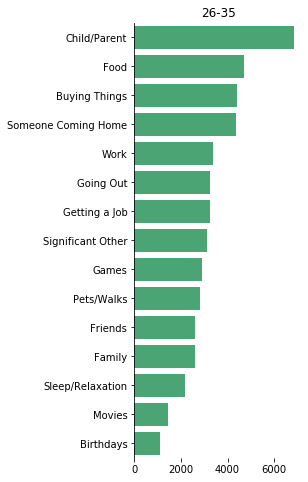

In [236]:
# Topics of 26-35
fig, ax = plt.subplots()
fig.set_size_inches(3, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)


the_series = df[(df.age <= 35) & (df.age >= 26)].topic_generalized.value_counts()

plt.title('26-35')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='mediumseagreen',  orient='h')
plt.show()

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


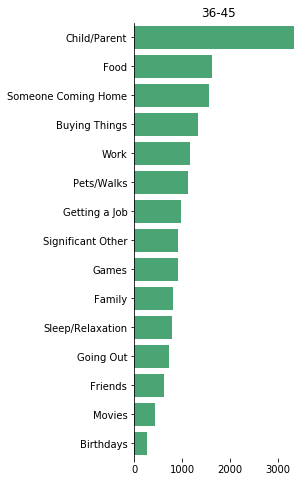

In [237]:
# Topics of 36-45
fig, ax = plt.subplots()
fig.set_size_inches(3, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)


the_series = df[(df.age <= 45) & (df.age >= 36)].topic_generalized.value_counts()

plt.title('36-45')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='mediumseagreen',  orient='h')
plt.show()

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


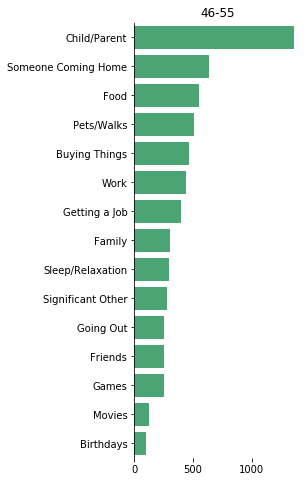

In [238]:
# Topics of 36-45
fig, ax = plt.subplots()
fig.set_size_inches(3, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
the_series = df[(df.age <= 55) & (df.age >= 46)].topic_generalized.value_counts()

plt.title('46-55')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='mediumseagreen',  orient='h')
plt.show()

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


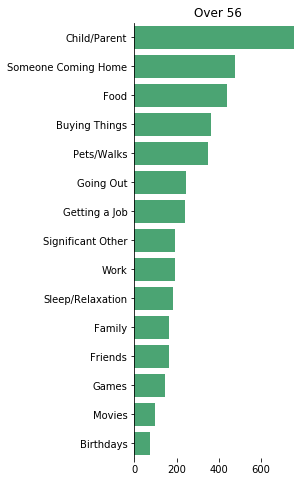

In [239]:
# Topics of over 56
fig, ax = plt.subplots()
fig.set_size_inches(3, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

the_series = df[df.age >= 56].topic_generalized.value_counts()

plt.title('Over 56')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='mediumseagreen',  orient='h')
plt.show()

## Marriage

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


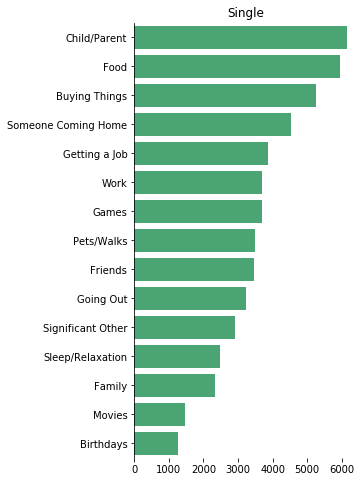

In [257]:
# Topics single people
fig, ax = plt.subplots()
fig.set_size_inches(4, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

the_series = df[df['marital'] == 'single'].topic_generalized.value_counts()

plt.title('Single')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color = 'mediumseagreen',  orient='h')
plt.show()

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


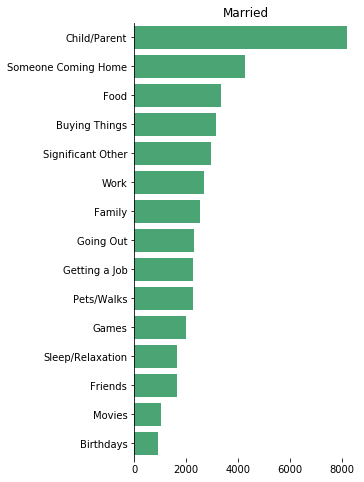

In [258]:
# Topics married people
fig, ax = plt.subplots()
fig.set_size_inches(4, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

the_series = df[df['marital'] == 'married'].topic_generalized.value_counts()

plt.title('Married')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='mediumseagreen',  orient='h')
plt.show()

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


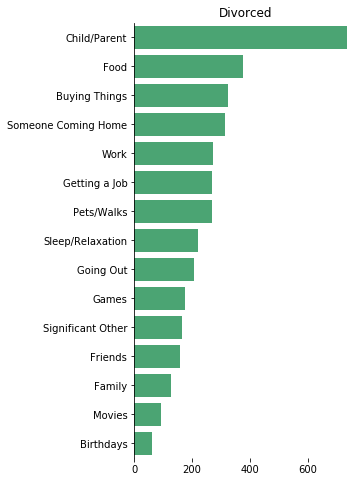

In [259]:
# Topics divorced people
fig, ax = plt.subplots()
fig.set_size_inches(4, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

the_series = df[df['marital'] == 'divorced'].topic_generalized.value_counts()

plt.title('Divorced')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='mediumseagreen',  orient='h')
plt.show()

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


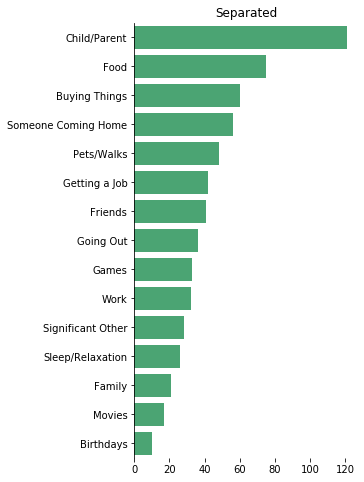

In [260]:
# Topics separated people
fig, ax = plt.subplots()
fig.set_size_inches(4, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

the_series = df[df['marital'] == 'separated'].topic_generalized.value_counts()

plt.title('Separated')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='mediumseagreen',  orient='h')
plt.show()

In [244]:
# Exploring when separated people mention significant others. Could be improved.
separated = df[df['marital'] == 'separated']
separated[separated['topic_generalized'] == 'Significant Other']['text']

11810    I figured out where I'm going to live.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


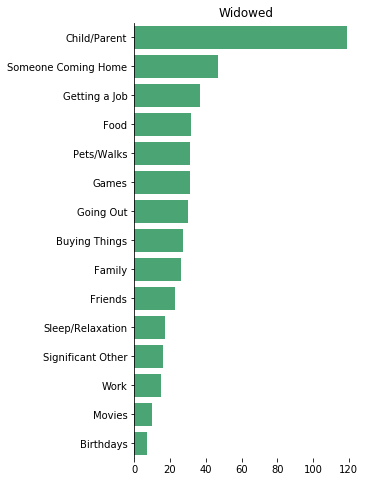

In [261]:
# Topics widowed people
fig, ax = plt.subplots()
fig.set_size_inches(4, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

the_series = df[df['marital'] == 'widowed'].topic_generalized.value_counts()

plt.title('Widowed')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='mediumseagreen',  orient='h')
plt.show()

## Parenthood

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


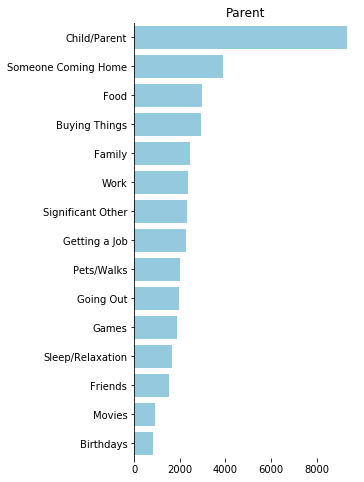

In [266]:
# Topics parents
fig, ax = plt.subplots()
fig.set_size_inches(4, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

the_series = df[df['parenthood'] == 'y'].topic_generalized.value_counts()

plt.title('Parent')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='skyblue',  orient='h')
plt.show()

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


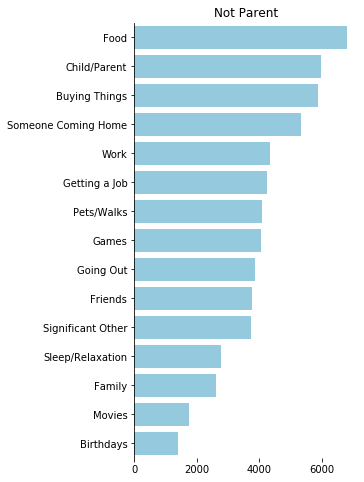

In [267]:
# Topics not parents
fig, ax = plt.subplots()
fig.set_size_inches(4, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

the_series = df[df['parenthood'] == 'n'].topic_generalized.value_counts()

plt.title('Not Parent')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='skyblue',  orient='h')
plt.show()

## Moms and Dads

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


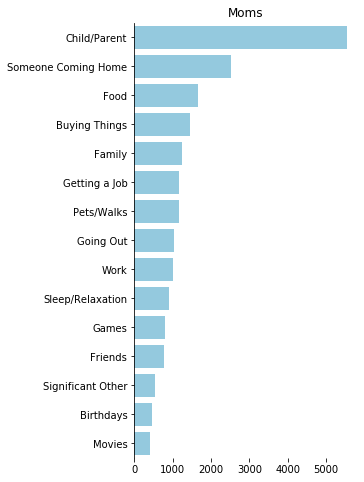

In [268]:
# Topics Moms
fig, ax = plt.subplots()
fig.set_size_inches(4, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

the_series = df[(df['parenthood'] == 'y') & (df['gender'] == 'f')].topic_generalized.value_counts()

plt.title('Moms')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='skyblue',  orient='h')
plt.show()

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


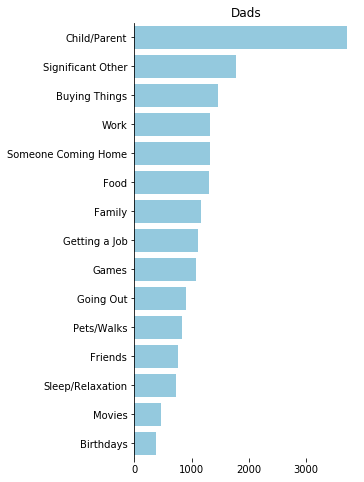

In [269]:
# Topics Dads
fig, ax = plt.subplots()
fig.set_size_inches(4, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

the_series = df[(df['parenthood'] == 'y') & (df['gender'] == 'm')].topic_generalized.value_counts()

plt.title('Dads')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='skyblue',  orient='h')
plt.show()

## Country

In [250]:
# Make a new column to bucket countries with few responses
df['country_bucket'] = [country for country in df['country']]

# Keep USA and India. Bucket the rest of the countries as 'Other'
allowed_vars = ['USA', 'IND']
df.loc[~df['country_bucket'].isin(allowed_vars), 'country_bucket'] = 'Other'

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


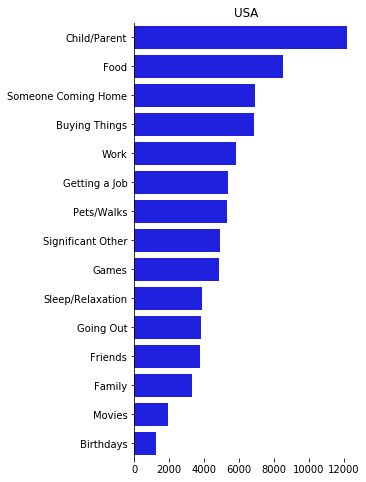

In [271]:
# Topics USA
fig, ax = plt.subplots()
fig.set_size_inches(4, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

the_series = df[df['country_bucket'] == 'USA'].topic_generalized.value_counts()

plt.title('USA')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='blue',  orient='h')
plt.show()

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


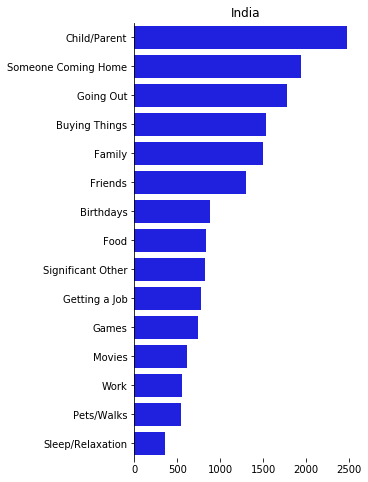

In [272]:
# Topics India
fig, ax = plt.subplots()
fig.set_size_inches(4, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

the_series = df[df['country_bucket'] == 'IND'].topic_generalized.value_counts()

plt.title('India')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='blue',  orient='h')
plt.show()

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


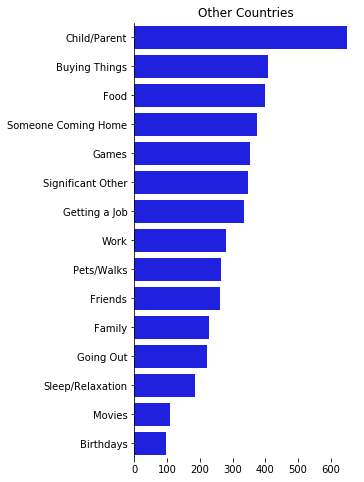

In [273]:
# Topics Other
fig, ax = plt.subplots()
fig.set_size_inches(4, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

the_series = df[df['country_bucket'] == 'Other'].topic_generalized.value_counts()

plt.title('Other Countries')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='blue',  orient='h')
plt.show()

## Wives and Husbands

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


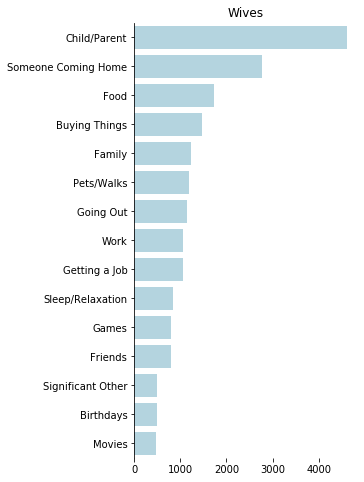

In [278]:
# Topics Wives
fig, ax = plt.subplots()
fig.set_size_inches(4, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

the_series = df[(df['marital'] == 'married') & (df['gender'] == 'f')].topic_generalized.value_counts()

plt.title('Wives')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='lightblue',  orient='h')
plt.show()

In [286]:
# Exploring when wives mention someone coming home.
wife_df = df[(df['marital'] == 'married') & (df['gender'] == 'f')]
wife_df[wife_df['topic_generalized'] == 'Someone Coming Home']['text'].head(10)

737     Brought flowers to my Moms grave on mothers day, made me happy for the memories.                                               
739     Helped an injured and it ended up flying away safe                                                                             
751     I planted many veggies today and a few flowers this afternoon.                                                                 
756     Continued planting my summer vegetables and flowers                                                                            
759     Today was  rainy day(again) so I did some house chores and spent time looking out the window watching the birds at the feeder. 
1992    my mother surprised me by coming home with my favourite cooked meal                                                            
1997    My mother surprised me at home with my favourite dish                                                                          
2015    Guests visited my home and gave me a sur

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


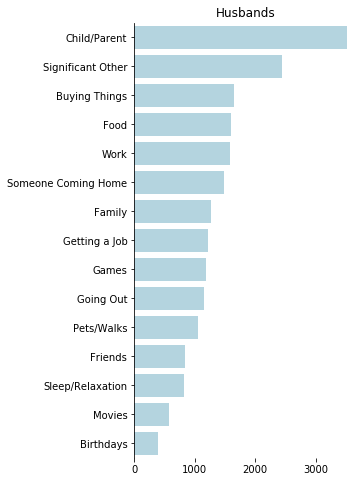

In [277]:
# Topics Husbands
fig, ax = plt.subplots()
fig.set_size_inches(4, 8)

right_side = ax.spines["right"]
right_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

the_series = df[(df['marital'] == 'married') & (df['gender'] == 'm')].topic_generalized.value_counts()

plt.title('Husbands')

y = the_series.index
x = the_series.values

sns.barplot(x, y, color='lightblue',  orient='h')
plt.show()

In [284]:
# Exploring when husbands mention their significant other.
husband_df = df[(df['marital'] == 'married') & (df['gender'] == 'm')]
husband_df[husband_df['topic_generalized'] == 'Significant Other']['text'].head(10)

0     My wife and i are celebrating our ten year anniversary today.                                      
2     Today i took the day off from my part time job to go and have a brunch date with my wonderful wife.
4     My wife cooked me a surprise dinner to take to work with me.                                       
8     My wife surprised me and bought me a new I-phone 6 so i could upgrade from the 4.                  
20    My wife and i went grocery shopping today and had a fun time hanging out without the kids.         
22    My wife made me some banana pancakes in the morning and they were delicious.                       
27    I had a nice breakfast with my wife and mother-in-law.                                             
37    my wife and i celebrated our 10 year anniversary.                                                  
46    I got to have a three day weekend which i spent with my wife, kids, and my parents.                
47    I learned how to cook a new meal that my